#### Network analysis on the interactions between users of r\WallStreetBets
In this notebook, a directed graph will be constructed from the interactions between people posting on the subreddit and the people commenting on them.
Later, some general statistics on the graph will be computed, followed by an authority vs hub analysis and a thorough visualization.

In [51]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [52]:
data = pd.read_pickle('post_comments')

In [75]:
df = pd.DataFrame(data, 
                  columns=['post_id', 'post_user', 'comment_id', 'comment_user'])

In [86]:
df_new = df.groupby(['post_user', 'comment_user']).size().reset_index()

In [87]:
df_new['weight'] = df_new[0]
df_new = df_new.drop(columns=[0])
#df_new = df_new.sample(10000)
df_new

,post_user,comment_user,weight
0,---------II---------,Inevita92,1
1,---------II---------,eidorianc,1
2,---------II---------,only1parkjisung,1
3,------TooyBooy------,bobfreehuman,1
4,------what------,jaymancini,1
...,...,...,...
2039741,zzzzzz129,grebfar,5
2039742,zzzzzz129,theycallme1,2
2039743,zzzzzz129,wallstreetboyfriend,3
2039744,zzzzzzzzzzzzzqqqqqqq,DunderMuggler,1


In [88]:
G = nx.from_pandas_edgelist(df_new, source='comment_user', target='post_user', 
                            edge_attr='weight', create_using=nx.DiGraph())

In [91]:
nodes = list(df_new.sample(10000).post_user)
nodes[:5]

['Claaaaaaaaws',
 'cryptonews123',
 'nailattack',
 'Affect-Win2741',
 'Psychological-Slice5']

In [92]:
G = G.subgraph(nodes)

In [93]:
G.number_of_nodes() 

9367

In [94]:
G.number_of_edges()

18326

In [95]:
N, K = G.number_of_nodes() , G.number_of_edges()
avg_deg = float(K) / N
avg_deg

1.956442831215971

In [96]:
in_degrees = list(G.in_degree()) # dictionary node:degree
in_values = sorted(set([in_degree[1] for in_degree in in_degrees]))
in_hist = [[in_degree[1] for in_degree in in_degrees].count(x) for x in in_values]

<ipython-input-97-f372c9d95eaf>:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 2*10**2])


(0.718059200494997, 200)

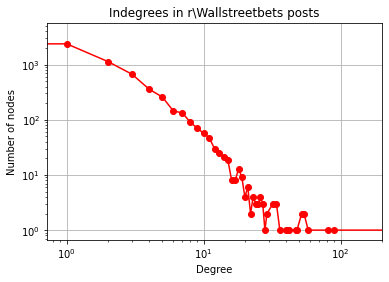

In [97]:
plt.figure() # you need to first do 'import pylab as plt'
plt.grid(True)
plt.loglog(in_values, in_hist, 'ro-') # in-degree
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Indegrees in r\Wallstreetbets posts')
plt.xlim([0, 2*10**2])

In [98]:
G_ud = G.to_undirected()
avg_clustering = nx.average_clustering(G_ud)
print(avg_clustering)   

0.1280974254874038


In [99]:
# Connected components are sorted in descending order of their size
G_mc = max(nx.connected_components(G_ud), key=len)
G_S = G_ud.subgraph(G_mc).copy()
# Betweenness centrality
bet_cen = nx.betweenness_centrality(G_S)
# Closeness centrality
clo_cen = nx.closeness_centrality(G_S)
# Eigenvector centrality
eig_cen = nx.eigenvector_centrality(G_S)

In [112]:
from collections import Counter

def get_top_keys(dictionary, top):
    items = Counter(dictionary).most_common(top)
    return items

In [117]:
top_bet_cen = get_top_keys(bet_cen,10)
top_clo_cen = get_top_keys(clo_cen,10)
top_eig_cen = get_top_keys(eig_cen,10)
top_bet_cen, '\n', top_clo_cen, '\n', top_eig_cen

([('AutoModerator', 0.5927030657441994),
  ('grebfar', 0.21736487139103478),
  ('[deleted]', 0.13731608981575602),
  ('theycallme1', 0.04920648945659032),
  ('jeepers_sheepers', 0.017343914214449797),
  ('LegalHelpNeeded3', 0.012590849226640386),
  ('moazzam0', 0.012274401255135299),
  ('Rambo2307', 0.011338320492898511),
  ('DawudM', 0.011332606770600644),
  ('jmanpc', 0.01099209587878992)],
 '\n',
 [('AutoModerator', 0.6326212728081887),
  ('grebfar', 0.5341474870831376),
  ('[deleted]', 0.5299655140274023),
  ('Sasha_Storm', 0.4465561925704861),
  ('moazzam0', 0.4450880626223092),
  ('TianObia', 0.4439412866958151),
  ('Dan_inKuwait', 0.4405361431781204),
  ('sveltepants', 0.44009287925696594),
  ('Lazy_Dragonfruit_727', 0.43992263056092845),
  ('landmanpgh', 0.43982054455445546)],
 '\n',
 [('AutoModerator', 0.5557172759669471),
  ('grebfar', 0.33454529910568503),
  ('[deleted]', 0.17921161922235074),
  ('theycallme1', 0.13168856391630046),
  ('zjz', 0.05804993736578397),
  ('Hardta

In [121]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(G_ud))
sorted(c[0])

['-DontPanic42-',
 '-Foolz_Gold-',
 '-Holden-_',
 '-Kenshii',
 '-NardDog',
 '-PhotogHelp-',
 '-StopRefresh-',
 '-THE_BIG_BOSS-',
 '-_1_2_3_-',
 '-_somebody_-',
 '-backdoorflush-',
 '-bjorn',
 '-gestern-',
 '-ordinary',
 '007baldy',
 '07undercover',
 '0ForTheHorde',
 '0dysseus123',
 '0lospo',
 '0mica0',
 '0nlyGoesUp',
 '0omzilla',
 '10-Day',
 '100petabytes',
 '106473',
 '11504',
 '1210m5g',
 '127_0_0_1_body',
 '12trever',
 '16BitHearts',
 '16bitfighter',
 '1980sTokyo',
 '19840404',
 '1AttemptedWriter',
 '1GIJosie',
 '1H8SocialMedia',
 '1PercentMax',
 '1hotrodney',
 '1ron_Hungry',
 '1ryan_ryan_ryan1',
 '1tickettothemoonpls',
 '24thScorpio',
 '26jan1788ftw',
 '273Celcius',
 '300Heartz',
 '31andnotdone',
 '39bears',
 '3bago',
 '3bizzle',
 '420No_Ragrets69',
 '420bot',
 '4DChessMAGA',
 '4Drugs',
 '4Reeze',
 '4aparsa',
 '4f434f5741',
 '50Potatoes',
 '50million',
 '56000hp',
 '5StarMan94',
 '5_NORTH',
 '5imo',
 '5oulReaperx',
 '5xan',
 '604X9',
 '616661666611',
 '643fgcCC',
 '64_skin',
 '692b

In [122]:
from networkx.algorithms.link_analysis.hits_alg import hits
h, a = nx.hits(G)
a

{'shiveredyetimbers': 1.3418786793932544e-05,
 'Professional-Fan-479': 1.4387865976333876e-12,
 'BendoverWrecked_em': 0.0,
 'nicholisd': 0.0,
 'IAmNotOnRedditAtWork': 0.0,
 'CarlM83': 2.7403761613075807e-05,
 'SuperheroSnow': 0.0,
 'gonzackCL': 0.0,
 'PrimeministerLOL': 2.677643280621903e-05,
 'sharkygofast': 1.745259091332019e-18,
 'kaygee420': 4.19809591394366e-05,
 'UndrrondXzy': 3.773644952303544e-10,
 'TheKnicksMakeMeDrink': 0.00034461326531025284,
 'ProcessMeMrHinkie': 4.630402385332972e-05,
 'Posture_Chk': 0.0,
 'ScottsdaleCSU': 1.8884881868527982e-08,
 'AlexandruC89': 6.054366433693524e-07,
 'atshahabs': 1.3388216403109516e-05,
 'Zakookas': 0.0,
 'ArcDelver': 2.4404767401993192e-06,
 'shivo33': 0.0,
 'DocHerb87': 0.00020082324604664273,
 'Upper_Departure_1198': 4.9104117455547665e-09,
 'Paddy1234pl': 2.5590600104106108e-05,
 'teokun123': 1.3402565031491377e-05,
 'Rhater': 0.0,
 'FueledBy_Fries': 0.0,
 'TheLochnessPlonster': 0.0,
 'skunk-beard': 0.0,
 'Jtbny': 4.017183032509485e

In [123]:
from networkx.algorithms.reciprocity import overall_reciprocity
rec = overall_reciprocity(G)
rec

0.01920768307322929

In [126]:
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length
len_shortest = nx.average_shortest_path_length(G_S)

In [127]:
len_shortest

2.8626489588382484